# MNIST

## Loading data and preparing training and test sets

Load MNIST dataset from scikit learn

In [30]:
from sklearn.datasets import fetch_mldata
#from sklearn.datasets import get_data_home
#print(get_data_home())
mnist = fetch_mldata('MNIST original')
X, y =  mnist["data"], mnist["target"]

C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit_image = X[50023].reshape(28,28)

#plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
#plt.axis("off")

Create training and testing sets. Out of 70000 images keep 10000 for test set.

In [32]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Lets shuffle the training sets

In [33]:
import numpy as np
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Training a Binary Classifier

In [70]:
from sklearn.linear_model import SGDClassifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42, tol=None)
sgd_clf.fit(X_train, y_train_5)
#sgd_clf.predict([some_digit])

C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

## Performance Measures

### Implementing Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv= 3, scoring="accuracy")

C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWa

array([0.96365, 0.95065, 0.9643 ])

Accuracy is very good as per the results but if we take a classifier which always returns "not 5" as result. Then this classifier will also be correct 90% of the time as 10% data is 5.

### Confusion Matrix

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rahul.sharma.SRMTECHSOL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWa

array([[54288,   291],
       [ 2137,  3284]], dtype=int64)

Confusion Matrix is defined as below

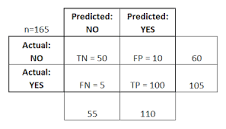

precision = TP/(TP + FP)

recall = TP/(TP + FN)



In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)   

0.9186013986013986

In [64]:
recall_score(y_train_5, y_train_pred)

0.6057922892455266

In [65]:
f1_score(y_train_5, y_train_pred)

0.730102267674522